In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Parse the string into a DataFrame


In [8]:

# The string data to be parsed
data_str = """
+-----------------------------------------+-------+-------+-------+
|                  Class                  |  IoU  |  Acc  |  Dice |
+-----------------------------------------+-------+-------+-------+
|                background               |  0.0  |  nan  |  0.0  |
|              shirt, blouse              | 44.32 | 54.15 | 61.41 |
|         top, t-shirt, sweatshirt        | 64.83 | 77.44 | 78.66 |
|                 sweater                 |  40.7 | 48.49 | 57.85 |
|                 cardigan                |  12.9 |  20.3 | 22.85 |
|                  jacket                 |  47.8 | 69.95 | 64.68 |
|                   vest                  |  4.87 |  5.49 |  9.29 |
|                  pants                  | 76.35 | 86.95 | 86.59 |
|                  shorts                 | 56.26 | 69.31 | 72.01 |
|                  skirt                  |  51.7 | 63.36 | 68.16 |
|                   coat                  | 51.62 | 65.22 | 68.09 |
|                  dress                  | 74.33 | 88.88 | 85.28 |
|                 jumpsuit                | 15.07 | 16.16 | 26.19 |
|                   cape                  |  0.0  |  0.0  |  0.0  |
|                 glasses                 | 59.07 | 59.17 | 74.27 |
|                   hat                   | 42.52 | 75.31 | 59.67 |
| headband, head covering, hair accessory | 16.36 | 16.58 | 28.12 |
|                   tie                   |  9.46 | 13.46 | 17.29 |
|                  glove                  |  2.54 |  2.57 |  4.96 |
|                  watch                  |  0.0  |  0.0  |  0.0  |
|                   belt                  | 21.85 | 28.09 | 35.87 |
|                leg warmer               |  0.0  |  0.0  |  0.0  |
|            tights, stockings            | 54.19 |  57.4 | 70.29 |
|                   sock                  |  0.0  |  0.0  |  0.0  |
|                   shoe                  | 63.69 | 67.82 | 77.81 |
|               bag, wallet               | 57.41 | 66.02 | 72.95 |
|                  scarf                  |  26.8 | 30.41 | 42.27 |
|                 umbrella                |  0.0  |  0.0  |  0.0  |
|                   hood                  | 13.78 | 15.57 | 24.22 |
|                  collar                 | 23.31 |  30.8 |  37.8 |
|                  lapel                  | 38.68 | 49.56 | 55.78 |
|                epaulette                |  0.0  |  0.0  |  0.0  |
|                  sleeve                 | 72.55 | 83.18 | 84.09 |
|                  pocket                 | 15.45 | 18.35 | 26.76 |
|                 neckline                | 23.58 | 27.66 | 38.16 |
|                  buckle                 |  0.0  |  0.0  |  0.0  |
|                  zipper                 |  0.03 |  0.03 |  0.06 |
|                 applique                |  0.0  |  0.0  |  0.0  |
|                   bead                  |  1.29 |  1.38 |  2.54 |
|                   bow                   |  0.0  |  0.0  |  0.0  |
|                  flower                 |  0.0  |  0.0  |  0.0  |
|                  fringe                 |  0.0  |  0.0  |  0.0  |
|                  ribbon                 |  0.0  |  0.0  |  0.0  |
|                  rivet                  |  0.0  |  0.0  |  0.0  |
|                  ruffle                 | 17.06 | 17.62 | 29.15 |
|                  sequin                 |  0.0  |  0.0  |  0.0  |
|                  tassel                 |  0.0  |  0.0  |  0.0  |
+-----------------------------------------+-------+-------+-------+
"""

In [9]:
# Parse the string into a DataFrame
def parse_table_string(data_str):
    # Split the string into lines
    lines = data_str.strip().split('\n')
    print(lines)
    data = []
    for i, line in enumerate(lines):
        if i == 1:
            # Header line
            columns = line.split('|')[1:-1]
            columns = [col.strip() for col in columns]
            
        if i >= 3:
            # Data lines
            data_line = line.split('|')[1:-1]
            data_line = [data.strip() for data in data_line]
            data.append(data_line)        
    
    
    # Create the DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    # Convert the data types of the columns
    df['IoU'] = df['IoU'].astype(float)
    df['Acc'] = df['Acc'].astype(float)
    df['Dice'] = df['Dice'].astype(float)
    
    return df
# Create the DataFrame
df = parse_table_string(data_str)
print(df.head())


['+-----------------------------------------+-------+-------+-------+', '|                  Class                  |  IoU  |  Acc  |  Dice |', '+-----------------------------------------+-------+-------+-------+', '|                background               |  0.0  |  nan  |  0.0  |', '|              shirt, blouse              | 44.32 | 54.15 | 61.41 |', '|         top, t-shirt, sweatshirt        | 64.83 | 77.44 | 78.66 |', '|                 sweater                 |  40.7 | 48.49 | 57.85 |', '|                 cardigan                |  12.9 |  20.3 | 22.85 |', '|                  jacket                 |  47.8 | 69.95 | 64.68 |', '|                   vest                  |  4.87 |  5.49 |  9.29 |', '|                  pants                  | 76.35 | 86.95 | 86.59 |', '|                  shorts                 | 56.26 | 69.31 | 72.01 |', '|                  skirt                  |  51.7 | 63.36 | 68.16 |', '|                   coat                  | 51.62 | 65.22 | 68.09 |', '|   

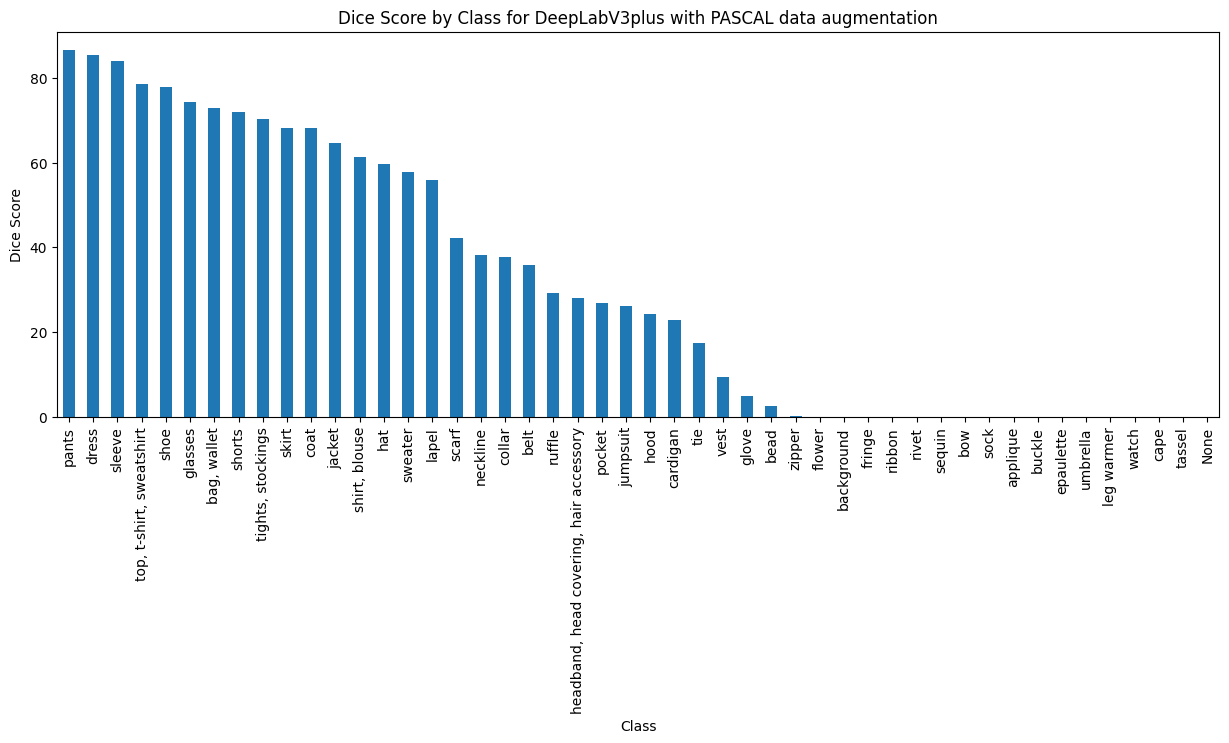

In [10]:
# Plot the data sorted by Dice score
df_dice = df.sort_values('Dice', ascending=False)
df_dice.plot(kind='bar', x='Class', y='Dice', legend=False, figsize=(15, 5))
plt.ylabel('Dice Score')
plt.title('Dice Score by Class for DeepLabV3plus with PASCAL data augmentation')
plt.show()


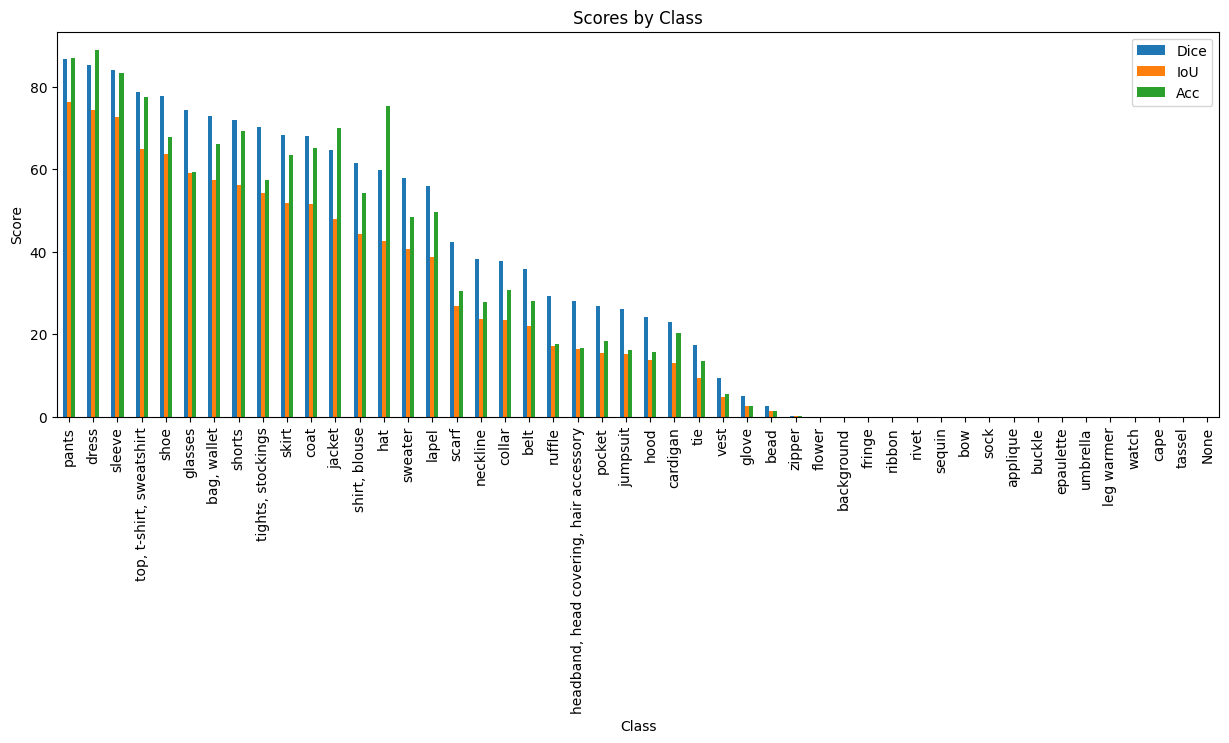

In [11]:
# plot the data sorted by Dice but also include the IoU and Acc scores as well in the same plot with different colors
df_dice = df.sort_values('Dice', ascending=False)
df_dice.plot(kind='bar', x='Class', y=['Dice', 'IoU', 'Acc'], figsize=(15, 5))
plt.ylabel('Score')
plt.title('Scores by Class')
plt.show()

